### 啤酒的数据集

In [1]:
import numpy as np
import pandas as pd

In [2]:
beer = pd.read_csv('data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [3]:
# 把名字去掉
X = beer[['calories', 'sodium', 'alcohol', 'cost']]
X

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


### K-means clustering: k-mean 集群

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)    

In [5]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

- n_clusters:簇的个数，即你想聚成几类
- init: 初始簇中心的获取方法
- n_init: 获取初始簇中心的更迭次数，为了弥补初始质心的影响，算法默认会初始10次质心，实现算法，然后返回最好的结果。
- max_iter: 最大迭代次数（因为kmeans算法的实现需要迭代）
- tol: 容忍度，即kmeans运行准则收敛的条件
- precompute_distances：是否需要提前计算距离，这个参数会在空间和时间之间做权衡，如果是True 会把整个距离矩阵都放到内存中，auto 会默认在数据样本大于featurs*samples 的数量大于12e6 的时候False,False 时核心实现的方法是利用Cpython 来实现的
- verbose: 冗长模式（不太懂是啥意思，反正一般不去改默认值）
- random_state: 随机生成簇中心的状态条件。
- copy_x: 对是否修改数据的一个标记，如果True，即复制了就不会修改数据。bool 在scikit-learn 很多接口中都会有这个参数的，就是是否对输入数据继续copy 操作，以便不修改用户的输入数据。这个要理解Python 的内存机制才会比较清楚。
- n_jobs: 并行设置
- algorithm: kmeans的实现算法，有：‘auto’, ‘full’, ‘elkan’, 其中 'full’表示用EM方式实现
## 假如我要构造一个聚类数为3的聚类器
- estimator = KMeans(n_clusters=3)#构造聚类器
- estimator.fit(data)#聚类
- label_pred = estimator.labels_ #获取聚类标签
- centroids = estimator.cluster_centers_ #获取聚类中心
- inertia = estimator.inertia_ # 获取聚类准则的总和

### 增加一个小问题，什么是数据拟合？最小二乘法是什么？常见的聚类算法有哪些

In [6]:
# 添加列表 

beer['cluster']= km.labels_
beer['cluster2']= km2.labels_
beer.sort_values('cluster')  # n_clusters=3
# cluster 是指用数字，0，1，2，。。。来表示该数据属于哪个集

,name,calories,sodium,alcohol,cost,cluster,cluster2
9,Budweiser_Light,113,8,3.7,0.40,0,1
11,Coors_Light,102,15,4.1,0.46,0,1
8,Miller_Lite,99,10,4.3,0.43,0,1
19,Schlitz_Light,97,7,4.2,0.47,0,1
4,Heineken,152,11,5.0,0.77,1,0
5,Old_Milwaukee,145,23,4.6,0.28,1,0
6,Augsberger,175,24,5.5,0.40,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,0
2,Lowenbrau,157,15,0.9,0.48,1,0
10,Coors,140,18,4.6,0.44,1,0


## 根据均值来计算差异性，看看哪些指标出现了差异

In [7]:
%matplotlib inline
from pandas.tools.plotting import scatter_matrix

cluster_centers = km.cluster_centers_
cluster_cneters_2 = km2.cluster_centers_

## 我们看看每一个集群的均值是什么

In [8]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,102.75,10.0,4.075000,0.440000,1
1,150.00,17.0,4.521429,0.520714,0
2,70.00,10.5,2.600000,0.420000,1


In [9]:
beer.groupby('cluster2').mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,150.000000,17.000000,4.521429,0.520714,1.000000
1,91.833333,10.166667,3.583333,0.433333,0.666667


### 均值取得质心

In [10]:
# 添加下标
centers = beer.groupby('cluster').mean().reset_index()
centers

,cluster,calories,sodium,alcohol,cost,cluster2
0,0,102.75,10.0,4.075000,0.440000,1
1,1,150.00,17.0,4.521429,0.520714,0
2,2,70.00,10.5,2.600000,0.420000,1


In [11]:
centers2 = beer.groupby('cluster2').mean().reset_index()
centers2

,cluster2,calories,sodium,alcohol,cost,cluster
0,0,150.000000,17.000000,4.521429,0.520714,1.000000
1,1,91.833333,10.166667,3.583333,0.433333,0.666667


## 我们把这些集群画出来看看

#### 1.0-先画这个 n_cluster = 3

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['font.size'] =14

In [13]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0,0.5,'酒精-Alcohol')

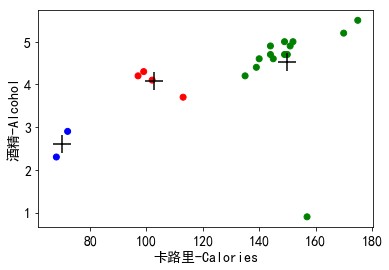

In [14]:
# 根据下标自动选择颜色
plt.scatter(beer['calories'], beer['alcohol'], c=colors[beer['cluster']])

# 画出质心，用+来标记，颜色是黑色
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

plt.xlabel('卡路里-Calories')
plt.ylabel('酒精-Alcohol')

## 引入散点矩阵 scatter_matrix

#### 1.1-with 3 centroids initialized

/Users/jason/.virtualenvs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


Text(0.5,0.98,'with 3 centroids initialized')

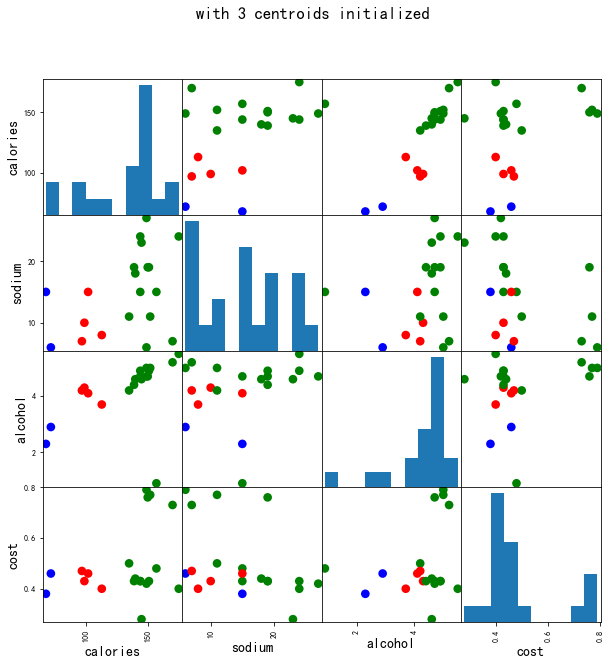

In [30]:
scatter_matrix(
    X, 
    s=300, 
    alpha=1, 
    c=colors[beer['cluster']], 
    figsize=(10, 10))
plt.suptitle('with 3 centroids initialized')

## 如何理解矩阵散点图
散布矩阵图呈对称结构，除对角上的密度函数图之外，其他子图分别显示了不同特征列之间的关联关系，如
- 酒精与卡路里
- 钠与卡路里
- 价格和卡路里
说明该些特征之间关联性很强；
相反地，其他各特征列之间的散布状态比较杂乱，基本无规律可循，说明各特征之间的关联性不强。 

#### 1.2-with 2 centroids initialized

/Users/jason/.virtualenvs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


Text(0.5,0.98,'with 2 centroids initializer')

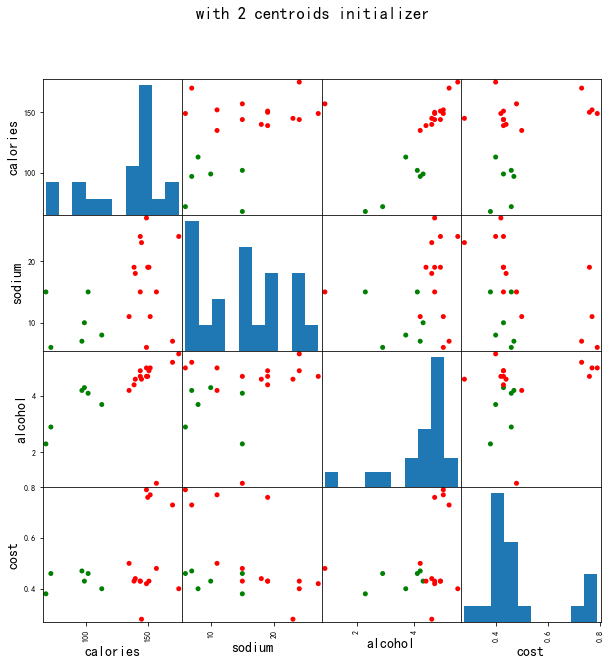

In [31]:
scatter_matrix(
    X,
    s=100, 
    alpha=1,
    c=colors[beer['cluster2']],
    figsize=(10,10)
)
plt.suptitle('with 2 centroids initializer')

## 我们试试标准化Scaled data，看看效果会不会更好

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

/Users/jason/.virtualenvs/ai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jason/.virtualenvs/ai/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [23]:
km = KMeans(n_clusters=3).fit(X_scaled)

In [27]:
# 添加列：标准化集群
beer['scaled_cluster']= km.labels_
# 排列
beer.sort_values('scaled_cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaler_cluster,scaled_cluster
0,Budweiser,144,15,4.7,0.43,1,0,0,0
1,Schlitz,151,19,4.9,0.43,1,0,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,1,0,0,0
5,Old_Milwaukee,145,23,4.6,0.28,1,0,0,0
6,Augsberger,175,24,5.5,0.40,1,0,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,0,0,0
16,Hamms,139,19,4.4,0.43,1,0,0,0
10,Coors,140,18,4.6,0.44,1,0,0,0
3,Kronenbourg,170,7,5.2,0.73,1,0,1,1
4,Heineken,152,11,5.0,0.77,1,0,1,1


In [28]:
# 拿到均值
beer.groupby('scaler_cluster').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
scaler_cluster,,,,,,,
0,148.375,21.125,4.7875,0.4075,1.00,0.00,0.0
1,155.250,10.750,4.9750,0.7625,1.00,0.00,1.0
2,105.375,10.875,3.3250,0.4475,0.75,0.75,2.0


/Users/jason/.virtualenvs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117d89e10>,
      dtype=object)

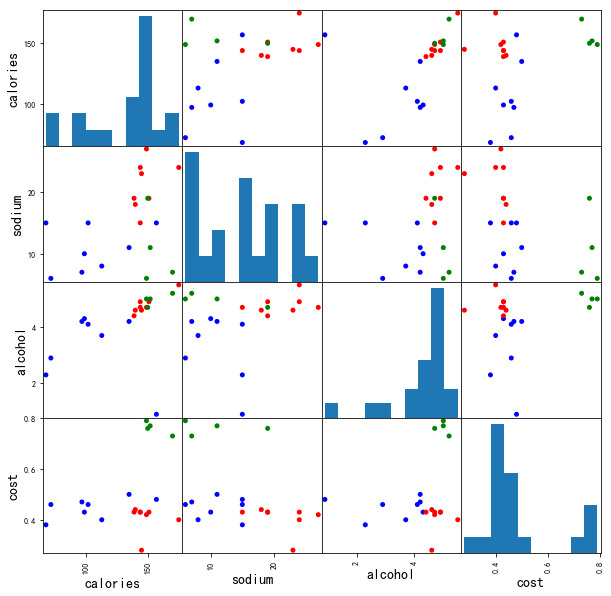

In [32]:
scatter_matrix(
    X, 
    c=colors[beer.scaled_cluster], 
    alpha=1, 
    figsize=(10,10), 
    s=100
)

- numpy中有一些常用的用来产生随机数的函数，randn()和rand()就属于这其中。 
- numpy.random.randn(d0, d1, …, dn)是从标准正态分布中返回一个或多个样本值。 
- numpy.random.rand(d0, d1, …, dn)的随机样本位于[0, 1)中。

## 我们如何评估我们的聚类做得好还是不好, 则看看是不是每个点都被正确的划分到了正确的集里面

## 聚类评估：轮廓系数(Silhouette Coefficient)--剪影系数
<img src='1.png' alt='FAO' width='490'> 

In [34]:
# 传入已经标准化的数据，和 没有标准化的数据
from sklearn import metrics

In [36]:
score_scaled = metrics.silhouette_score(X, beer.scaled_cluster)
score = metrics.silhouette_score(X, beer.cluster)

In [37]:
print(score_scaled, score)

0.17978068089399363 0.6731775046455792


# 可见有时候标准化不一定好

In [48]:
# 不知道哪个k值适合，我们可以遍历一遍
scores_K = []
scores = []
for k in range(2, 20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores_K.append([score, k])
    scores.append(score)
scores

[0.6917656034079485,
 0.6731775046455792,
 0.5857040721127799,
 0.4225487335172076,
 0.45591821670133814,
 0.43776116697963163,
 0.38946337473126047,
 0.3974640517242733,
 0.40815990138999536,
 0.41282646329878236,
 0.34597752371275525,
 0.3122143924843148,
 0.3070778214477033,
 0.31834561839139464,
 0.2849514001174895,
 0.2349807733307197,
 0.1588091017496327,
 0.08423051380156171]

Text(0,0.5,'Silhouette Score')

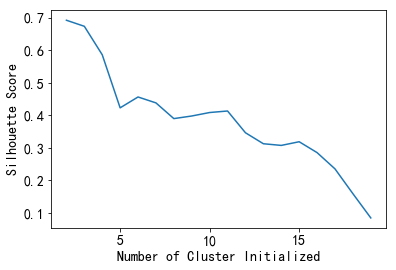

In [49]:
plt.plot(list(range(2, 20)), scores)
plt.xlabel('Number of Cluster Initialized')
plt.ylabel('Silhouette Score')

### DBSCAN clustering: 一个更牛逼的算法

In [51]:
from sklearn.cluster import DBSCAN
# eps半径 min_sample密度
db = DBSCAN(eps=10, min_samples=2).fit(X)

In [52]:
labels = db.labels_

In [53]:
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaler_cluster,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,0,1,2,2,-1
3,Kronenbourg,170,7,5.2,0.73,1,0,1,1,-1
6,Augsberger,175,24,5.5,0.40,1,0,0,0,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,1,0,0,0,0
16,Hamms,139,19,4.4,0.43,1,0,0,0,0
14,Kirin,149,6,5.0,0.79,1,0,1,1,0
13,Becks,150,19,4.7,0.76,1,0,1,1,0
12,Michelob_Light,135,11,4.2,0.50,1,0,2,2,0
10,Coors,140,18,4.6,0.44,1,0,0,0,0
0,Budweiser,144,15,4.7,0.43,1,0,0,0,0


In [54]:
# 同样找到质心
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaler_cluster,scaled_cluster
cluster_db,,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.666667,0.333333,1.000000,1.000000
0,146.250000,17.250000,4.383333,0.513333,1.000000,0.000000,0.583333,0.583333
1,99.333333,10.666667,4.200000,0.453333,0.000000,1.000000,2.000000,2.000000
2,70.000000,10.500000,2.600000,0.420000,2.000000,1.000000,2.000000,2.000000


/Users/jason/.virtualenvs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a9c2128>,
      dtype=object)

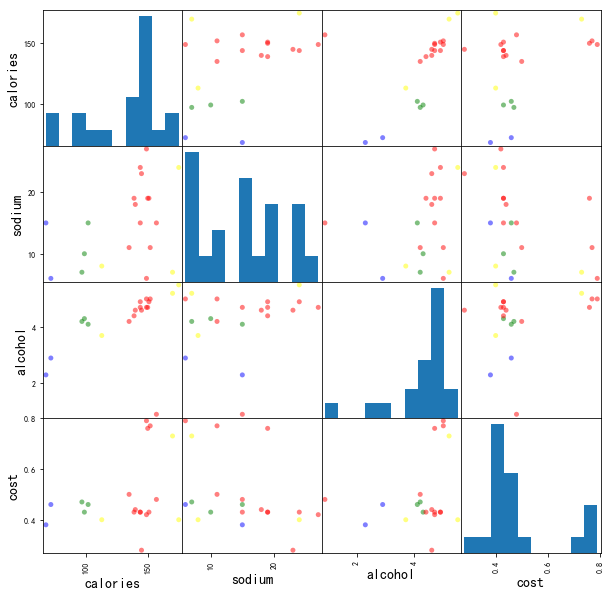

In [55]:
scatter_matrix(
    X, 
    c=colors[beer.cluster_db], 
    figsize=(10, 10), 
    s=100)